## Importing necessary libraries

In [17]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import math as m
import quandl 
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Fetching data

In [18]:
df=quandl.get('WIKI/GOOGL')

In [19]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


## Data Cleaning

In [20]:
df=df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0
...,...,...,...,...,...
2018-03-21,1092.570000,1108.700000,1087.210000,1094.000000,1990515.0
2018-03-22,1080.010000,1083.920000,1049.640000,1053.150000,3418154.0
2018-03-23,1051.370000,1066.780000,1024.870000,1026.550000,2413517.0


In [21]:
df['hl_pctg']=(df['Adj. High']-df['Adj. Close'])/df['Adj. Close']*100
df['daily_pct']=(df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100
df=df[['Adj. Close','hl_pctg','daily_pct','Adj. Volume']]

In [22]:
df.head()

,Adj. Close,hl_pctg,daily_pct,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


## Building a model for predictions

In [23]:
forecast=df['Adj. Close']

In [24]:
df.fillna(value=-99999,inplace=True)

c:\users\harshpreet kaur\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [35]:
forecastno=(int(m.ceil(0.001*len(df))))

In [36]:
df['Label']=forecast.shift(-forecastno)

C:\Users\HARSHP~1\AppData\Local\Temp/ipykernel_17504/4130643783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label']=forecast.shift(-forecastno)


In [37]:
df

,Adj. Close,hl_pctg,daily_pct,Adj. Volume,Label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,53.164113
2004-08-20,54.322689,0.710922,7.227007,22834300.0,54.122070
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,53.239345
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,51.162935
2004-08-25,53.164113,1.886792,1.183658,9188600.0,51.343492
...,...,...,...,...,...
2018-01-30,1177.370000,0.896914,-0.029718,1792602.0,1068.760000
2018-01-31,1182.220000,0.346805,-0.134312,1643877.0,1084.430000
2018-02-01,1181.590000,0.495942,0.476195,2774967.0,1055.410000


## Specifying the labels and features, further dividing them into training and testing sets

In [38]:
X = np.array(df[['Adj. Close','hl_pctg','daily_pct','Adj. Volume']])
X = preprocessing.scale(X)
X_lately = X[-forecastno:]

df.dropna(inplace=True)

y = np.array(df['Label'])


c:\users\harshpreet kaur\appdata\local\programs\python\python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [39]:
len(X),len(y)

(3389, 3389)

In [40]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [41]:
len(X_train)
# print(0.8*3389)



2711

## Defining classifiers and testing its accuracy

In [42]:
cfr=svm.SVR()

In [43]:
cfr.fit(X_train,y_train)

SVR()

In [44]:
confidence=cfr.score(X_test, y_test)

In [45]:
confidence

0.8080375036301167

In [46]:
# 80% accuracy

In [47]:
cfr2=LinearRegression(n_jobs=-1)

In [48]:
cfr2.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [49]:
confidence2=cfr2.score(X_test,y_test)

In [50]:
confidence2

0.9967156290328004

In [51]:
#97% accuracy

## exploring different kernels

In [52]:
kerns=['linear','poly','rbf','sigmoid']
for k in kerns:
    cfr3=svm.SVR(kernel=k)
    cfr.fit(X_train,y_train)
    print(cfr.score(X_test,y_test))

0.8080375036301167
0.8080375036301167
0.8080375036301167
0.8080375036301167


In [53]:
predicted=cfr2.predict(X_lately)
print(predicted)
print(len(predicted))
print(confidence2)


[1183.38764083 1182.83517755 1120.13162299 1071.08842547]
4
0.9967156290328004


In [54]:
forecastno

4

## Visualizing the model

In [55]:
style.use('ggplot')

In [56]:
df['prediction']=np.nan

C:\Users\HARSHP~1\AppData\Local\Temp/ipykernel_17504/1821398529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prediction']=np.nan


In [57]:
last_date=df.iloc[-1].name
secs=86400
unix_time=last_date.timestamp()+secs
unix_time

1517875200.0

In [58]:
for i in predicted:
    next_date=datetime.datetime.fromtimestamp(unix_time)
    unix_time+=secs
    df.loc[next_date]=[np.nan for i in range(len(df.columns)-1)]+[i]

c:\users\harshpreet kaur\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


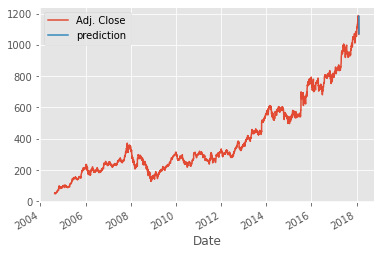

In [59]:
df['Adj. Close'].plot()
df['prediction'].plot()
plt.legend()